In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import time
from divisive_solver.heuristic import MD_problem_heuristic
from divisive_solver.extra_functions import diversity_matrix
from divisive_solver.local_search import local_search_MA
import sklearn
from sklearn.datasets import make_blobs

(1000, 2)


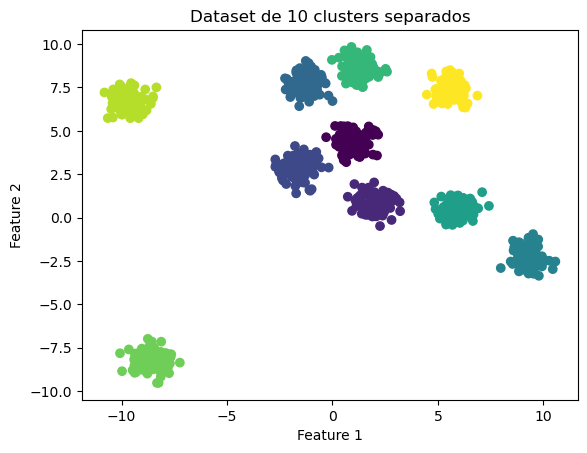

[]

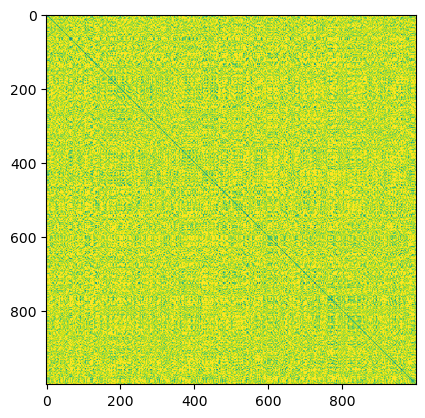

In [2]:
n_centers = 10
# Crea un dataset ficticio de 3 clusters separados
samples, y = make_blobs(n_samples=1000, centers=n_centers, random_state=0, cluster_std=0.5)

print(samples.shape)

# Visualiza el dataset
plt.scatter(samples[:, 0], samples[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Dataset de {n_centers} clusters separados')
plt.show()

D_matrix = diversity_matrix(samples, y)
plt.imshow(D_matrix)
plt.plot()


In [3]:
tot_dim = 1000
M_dim = 13
# Elementos totales
# N = np.random.randn(tot_dim,2).reshape(tot_dim, 2)

# N = np.random.randint(0,20, size= (tot_dim,2))
N = samples


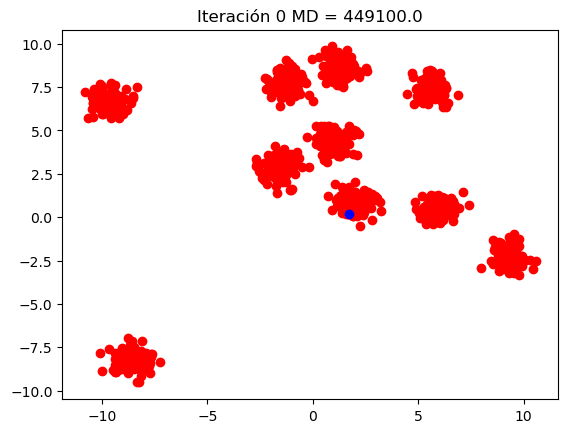

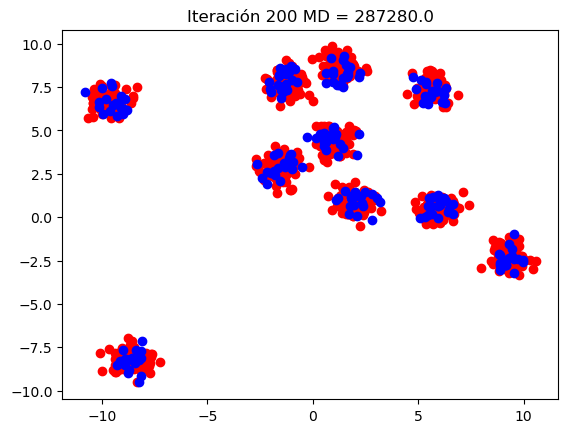

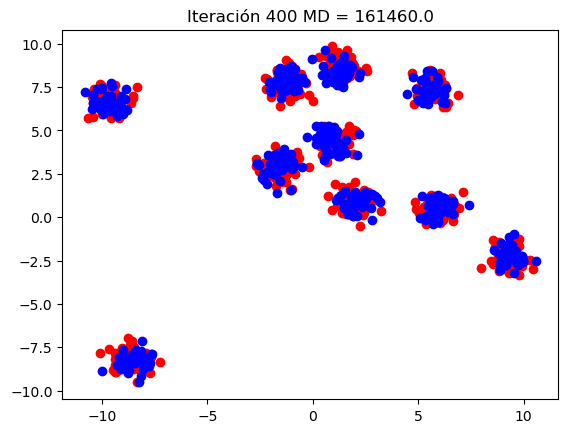

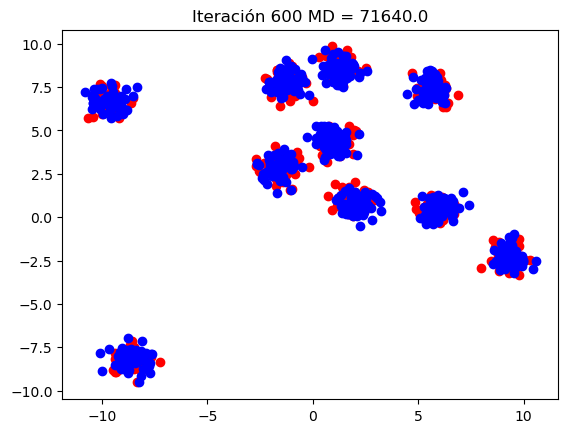

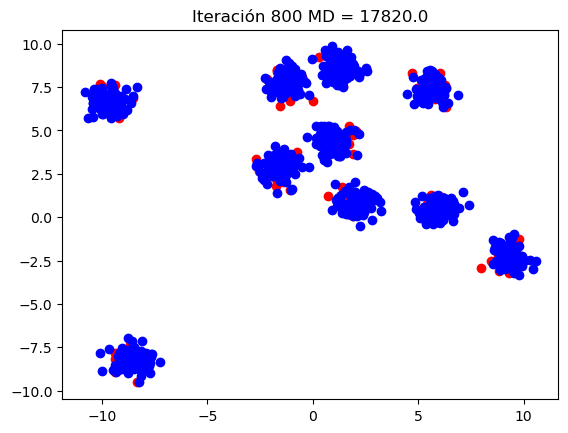

------------------------------------------------------------------------
---------------------------RESULTADOS-----------------------------------
------------------------------------------------------------------------
Vector X:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

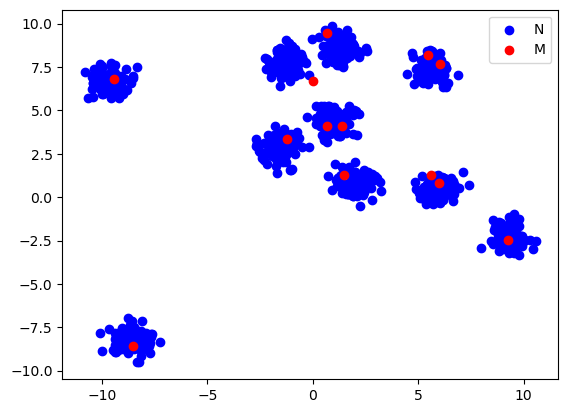

In [4]:
X, data, MD_matrix = MD_problem_heuristic(N, M_dim,0, verbose = True, D_matrix=D_matrix, plot_int = 200)


In [5]:
X = np.array([1,0,1])
D = np.array([[0, 1, 2], [1, 0, 3], [2, 3, 0]])
local_search_MA(X, D, 1, 1)

(array([0, 1, 1]), True)

In [6]:
import numpy as np

# Generar conjunto de puntos
n_points = 70
mean = 0
std_dev = 5
points = np.random.normal(mean, std_dev, (n_points, 2))

print(points)


[[  5.61397459   1.5140261 ]
 [  0.35429629   0.36520711]
 [ -7.11162922   7.60034745]
 [ -1.45696988  -0.66545142]
 [ -0.86534798  -8.80825834]
 [ -0.43836534   6.83439683]
 [  5.62657052  -1.79497776]
 [  6.10304049  -6.69747775]
 [  2.14186685  -0.61731575]
 [  7.07188594  -0.62025332]
 [ 10.04078544   1.14943269]
 [  3.02446867   8.13579912]
 [  7.97280267   1.15217085]
 [ -0.32455171  -4.84490126]
 [  2.95621403  -3.91387752]
 [ -2.22116413  -1.72593079]
 [ -4.40900275  -2.21326621]
 [ -2.70458149  -6.61613684]
 [ -0.5639946    4.53672971]
 [  4.07634954   1.14548974]
 [ -5.13089389   2.38762735]
 [  6.46349114  -3.65729118]
 [ -8.02701128   4.94738088]
 [  0.55407305  -1.90465706]
 [  0.57479586   1.72656321]
 [ -8.67479382   8.29175553]
 [ 11.49885762  -2.3556763 ]
 [  6.31357742  -5.85257725]
 [  5.32894599  -3.49968693]
 [  0.72039557   1.99271051]
 [  0.13434624   5.27918566]
 [ -0.36591712  -3.32860331]
 [ -0.22056204  -1.8163351 ]
 [ -0.06172407   0.21060745]
 [  9.79647945

[{'MD_ev': [26272.7417614847, 25693.189180729074, 25109.435614531845, 24525.682048334616, 23944.299979119656, 23363.35799555862, 22778.889566169688, 22186.602517876585, 21601.197765560253, 21019.309344110166, 20445.03157430058, 19871.05917159479, 19302.59521471358, 18736.60375552492, 18175.254462868514, 17615.620193974202, 17051.05277340191, 16495.570956133986, 15945.891338430283, 15400.299473220712, 14861.760290088507, 14329.232918373002, 13806.431209113201, 13293.804477407128, 12789.187523866487, 12289.552433135972, 11796.913426906163, 11307.281056461072, 10822.408623583067, 10347.621320911549, 9884.223804807109, 9427.54714585137, 8975.194990764117, 8529.949331945543, 8095.089072303528, 7670.137072383088, 7258.134283111807, 6855.233647256884, 6461.6180664106605, 6070.430865182136, 5697.2911514328425, 5332.133907910793, 4978.747074168899, 4641.8992519844605, 4308.002135870965, 3990.4047488674514, 3678.3832953661336, 3383.7814379257184, 3089.951008858255, 2813.3538293801184, 2549.48613

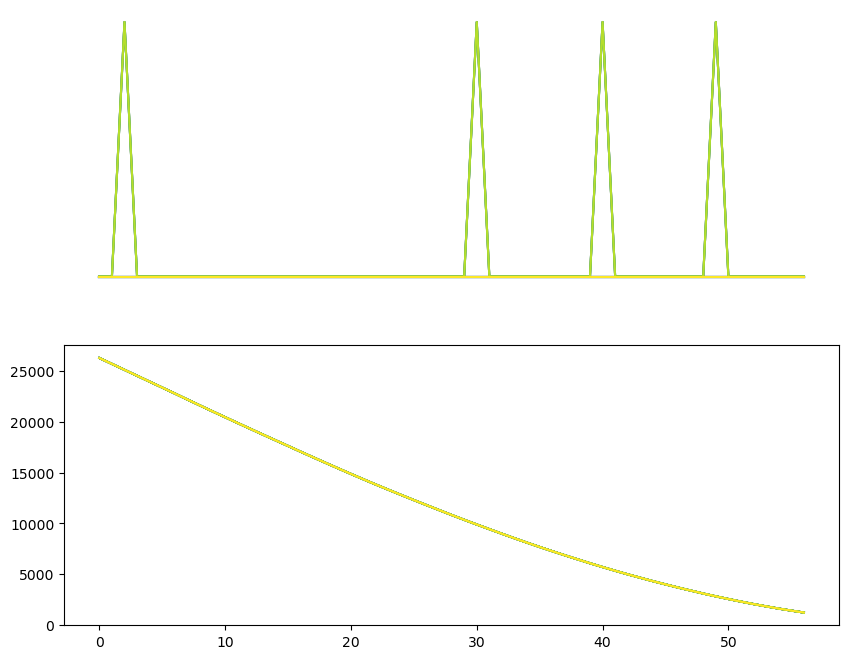

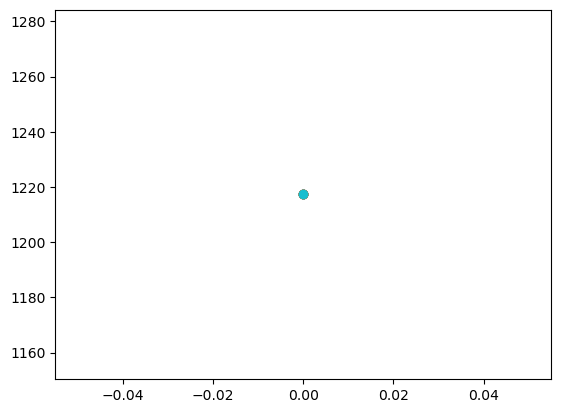

Número de iteraciones:  440
Solución inicial:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
Valor de MD inicial:  1217.2775928765527
Solución final:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
Valor de MD final:  1217.4165402965627
Posiciones intercambiadas,  52 entra y 23sale
Se cumple condicion 1217.4165402965627>1217.2775928765527
La diferenca de MD es 0.1389474200100267


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0.]),
 True)

In [7]:
n_points = 70
mean = 0
std_dev = 5
np.random.seed(0)
N = np.random.randint(0,20, size= (n_points,2))
M_dim = 13

seed = []
datas  = []
for i in range(10):
  X, data, Da_m = MD_problem_heuristic(N, M_dim, i, verbose = False)
  datas.append(data)
  seed.append(i)
print(datas)
colores = plt.cm.viridis(np.linspace(0, 1, len(datas)))

fig, ax = plt.subplots(2, figsize=(10, 8))

for data, color in zip(datas, colores):
    ax[0].plot(data["Elección"], color=color)  # Utiliza el color específico para esta serie
    ax[1].plot(data["MD_ev"], color=color)     # Mismo color para la correspondiente evolución de MD
    ax[0].axis("off")
plt.show()
for data in datas:
  plt.scatter(0, data["MD_ev"][-1])
plt.show()
local_search_MA(X, Da_m, n_points-np.sum(X), np.sum(X)-1, verbose = True)

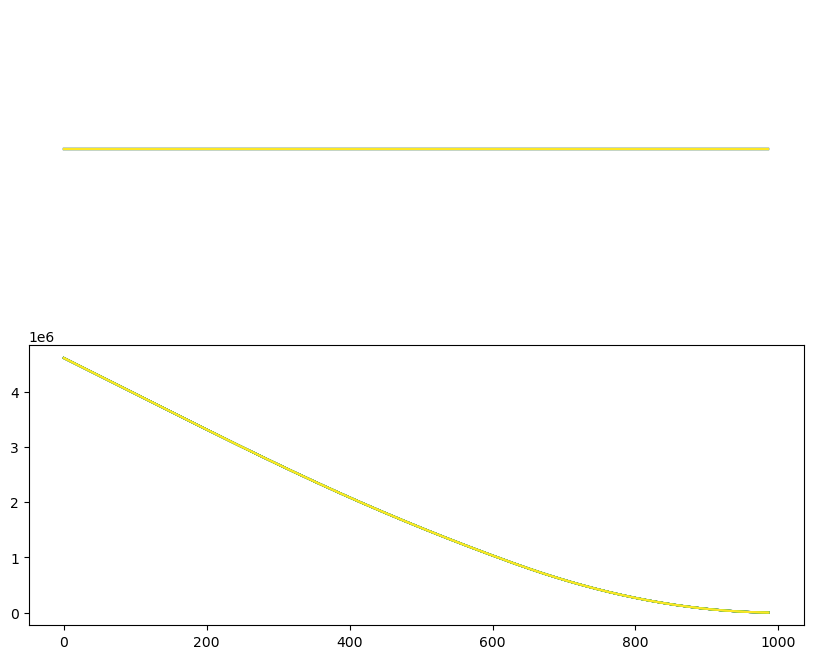

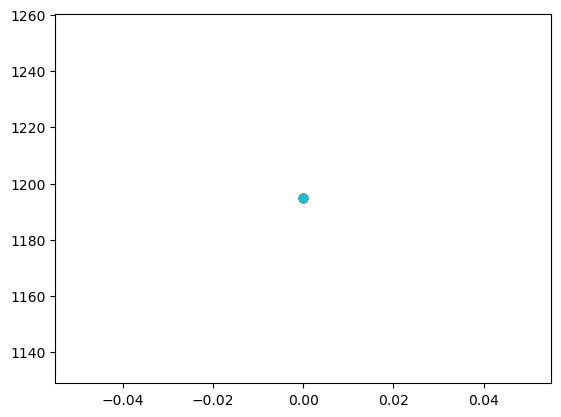

In [7]:
seed = []
datas  = []
for i in range(10):
  X, data, DA = MD_problem_heuristic(N, M_dim, i, verbose = False)
  datas.append(data)
  seed.append(i)
  
colores = plt.cm.viridis(np.linspace(0, 1, len(datas)))

fig, ax = plt.subplots(2, figsize=(10, 8))

for data, color in zip(datas, colores):
    ax[0].plot(data["Elección"], color=color)  # Utiliza el color específico para esta serie
    ax[1].plot(data["MD_ev"], color=color)     # Mismo color para la correspondiente evolución de MD
    ax[0].axis("off")
plt.show()
for data in datas:
  plt.scatter(0, data["MD_ev"][-1])
plt.show()
    